<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg" />
    
**<center>[mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course** </center><br>
Author: [Yury Kashnitsky](https://yorko.github.io) (@yorko). Edited by Anna Tarelina (@feuerengel), and Mikhail Korshchikov (@MS4). [mlcourse.ai](https://mlcourse.ai) is powered by [OpenDataScience (ods.ai)](https://ods.ai/) © 2017—2022

# <center>Assignment #3. Task </center> <a class="tocSkip">
## <center>Decision trees for classification and regression </center><a class="tocSkip">

In this assignment, we will find out how a decision tree works in a regression task, then will build and tune classification decision trees for identifying heart diseases.

### Your task is to:
 1. write code and perform computations in the cells below;
 2. choose answers in the [webform](https://docs.google.com/forms/d/1ZUYREiTJjg8IiZAIIMdWRODtPe1qfC0UBYq_i2WFe1c/). 
 

*If you are sure that something is not 100% correct with the assignment/solution, please leave your feedback via the mentioned webform ↑*

-----

In [29]:
import numpy as np
import pandas as pd

# if seaborn is not yet installed, run `pip install seaborn` in terminal
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

sns.set()
import matplotlib.pyplot as plt

# sharper plots
%config InlineBackend.figure_format = 'retina'

## 1. Decision trees for regression: a toy example

Let's consider the following one-dimensional regression problem. We need to build a function $\large a(x)$ to approximate the dependency $\large y = f(x)$ using the mean-squared error criterion: $\large \min \sum_i {(a(x_i) - f(x_i))}^2$.

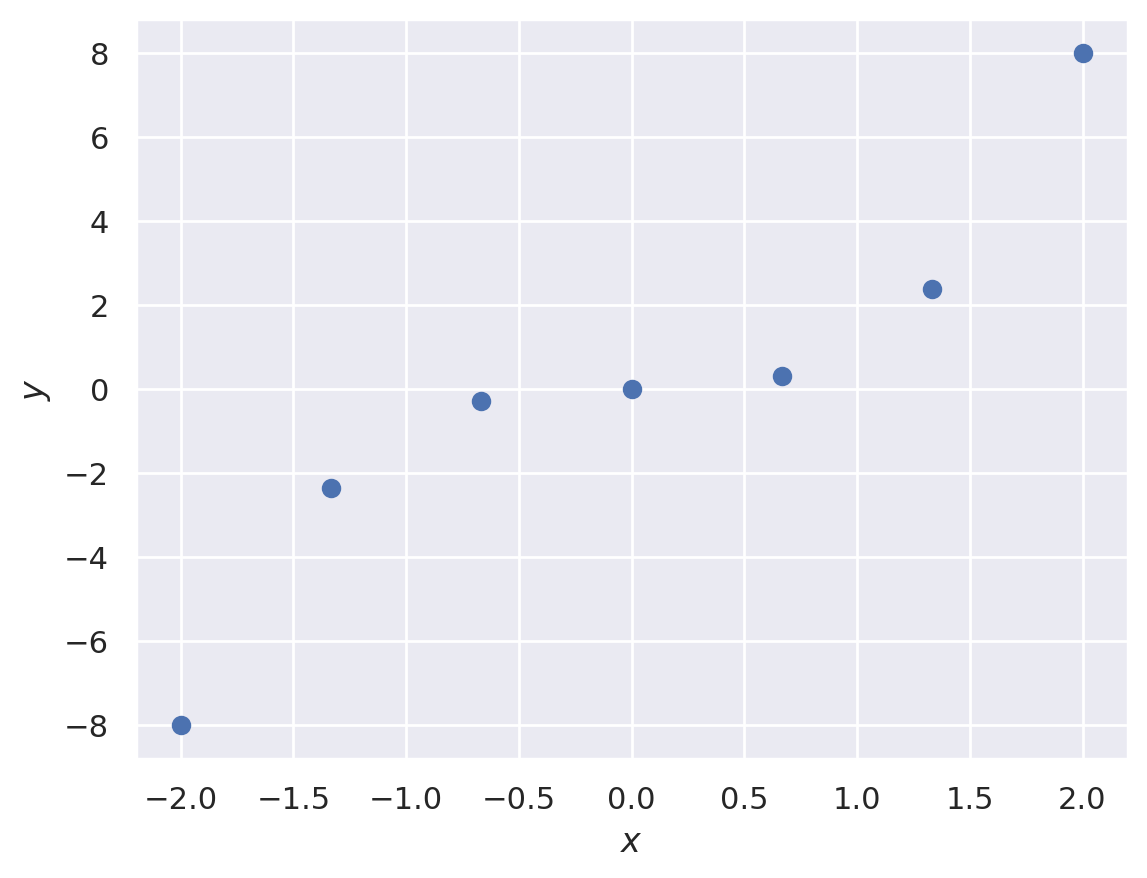

In [30]:
X = np.linspace(-2, 2, 7)
y = X ** 3  # original dependecy

plt.scatter(X, y)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$");

Let's make several steps to build a decision tree. In the case of a **regression** task, at prediction time, the leaf returns the average value for all observations in this leaf.

Let's start with a tree of depth 0, i.e. all observations placed in a single leaf. 

<br>You'll need to build a tree with only one node (also called **root**) that contains all train observations (instances). 
<br>How will predictions of this tree look like for $x \in [-2, 2]$? <br> Create an appropriate plot using a pen, paper and Python if needed (but no `sklearn` is needed yet).

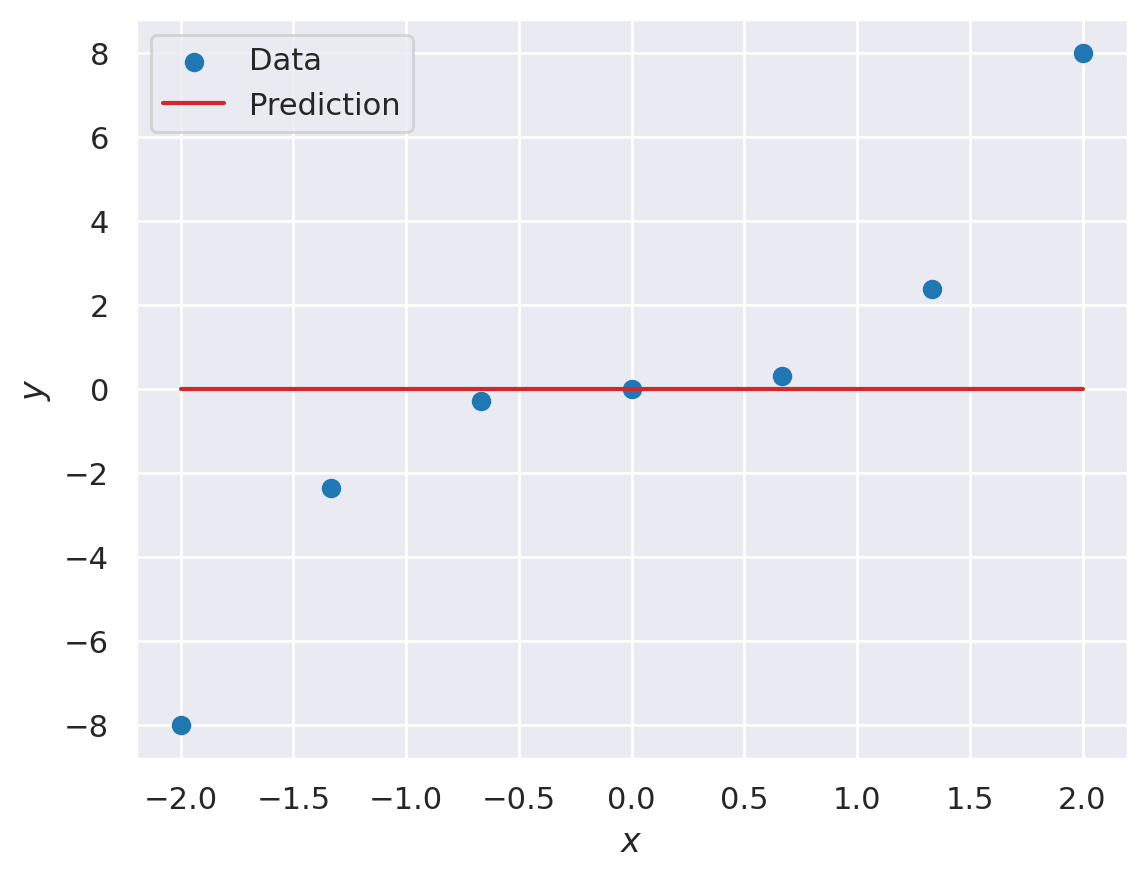

In [31]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

y_pred = np.array([np.mean(y) for _ in X])

plt.scatter(X, y, color='tab:blue', label='Data')
plt.plot(X, y_pred, color='tab:red', label='Prediction')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.plot();

**Making first splits.**
<br>Let's split the data according to the following condition $[x < 0]$. It gives us the tree of depth 1 with two leaves. To clarify, for all instances with $x \geqslant 0$ the tree will return some value, for all instances with $x < 0$ it will return another value. Let's create a similar plot for predictions of this tree.

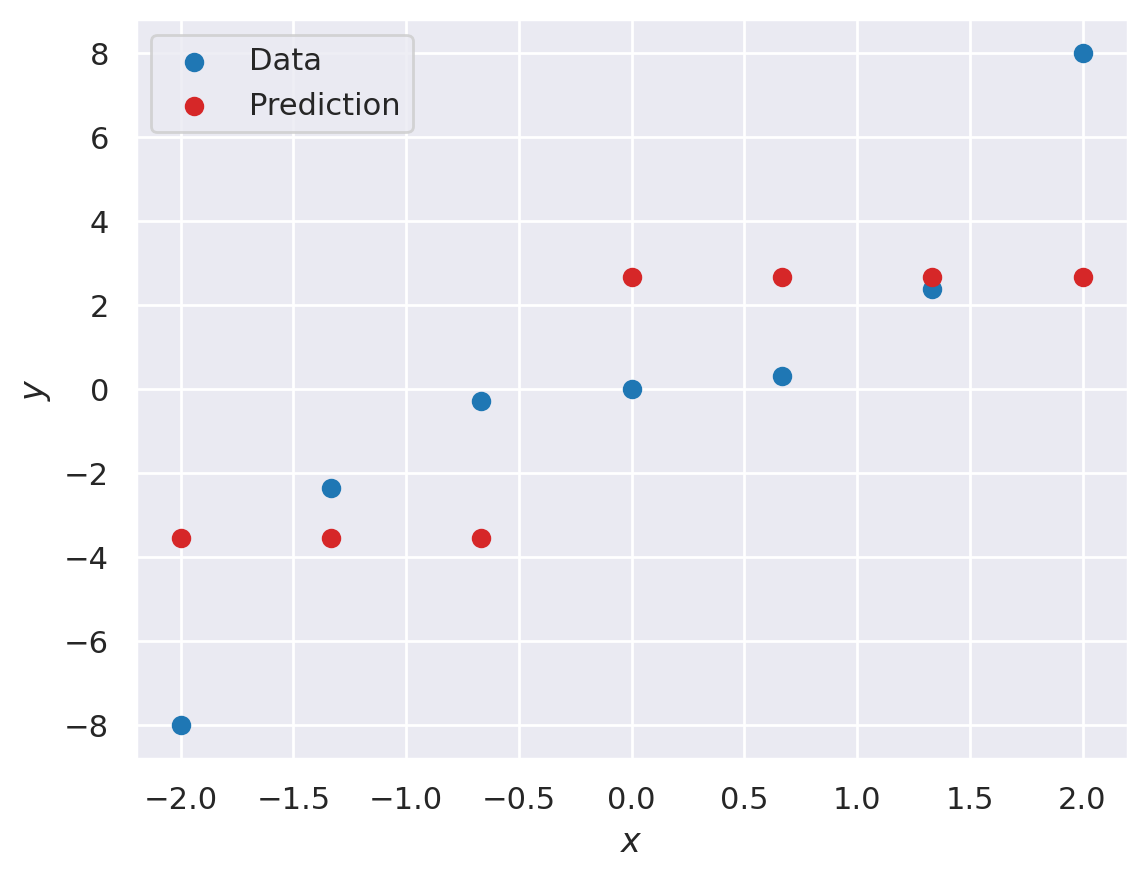

In [32]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
y_pred = [np.mean(y[X < 0]) if x < 0 else np.mean(y[X >=0]) for x in X]

plt.scatter(X, y, color='tab:blue', label='Data')
plt.scatter(X, y_pred, color='tab:red', label='Prediction')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.plot();

In the decision tree algorithm, the feature and the threshold for splitting are chosen according to some criterion. The commonly used criterion for regression is based on variance:

$$\large Q(X, y, j, t) = D(X, y) - \dfrac{|X_l|}{|X|} D(X_l, y_l) - \dfrac{|X_r|}{|X|} D(X_r, y_r),$$

where $\large X$ and $\large y$ are a feature matrix and a target vector (correspondingly) for training instances in a current node, $\large X_l, y_l$ and $\large X_r, y_r$ are splits of samples $\large X, y$ into two parts w.r.t. $\large [x_j < t]$ (by $\large j$-th feature and threshold $\large t$), $\large |X|$, $\large |X_l|$, $\large |X_r|$ (or, the same, $\large |y|$, $\large |y_l|$, $\large |y_r|$) are sizes of appropriate samples, and $\large D(X, y)$ is variance of answers $\large y$ for all instances in $\large X$:

$$\large D(X, y) = \dfrac{1}{|X|} \sum_{j=1}^{|X|}(y_j – \dfrac{1}{|X|}\sum_{i = 1}^{|X|}y_i)^2$$

Here $\large y_i = y(x_i)$ is the answer for the $\large x_i$ instance. Feature index $\large j$ and threshold $\large t$ are chosen to maximize the value of criterion  $\large Q(X, y, j, t)$ for each split.

In our 1D case,  there's only one feature so $\large Q$ depends only on threshold $\large t$ and training data $\large X$ and $\large y$. Let's designate it $\large Q_{1d}(X, y, t)$ meaning that the criterion no longer depends on feature index $\large j$, i.e. in 1D case $\large j = 1$.

In [33]:
def regression_var_criterion(X, y, t):
    #pass
    # You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
    
    X_left, X_right = X[X < t], X[X >= t]
    y_left, y_right = y[X < t], y[X >= t]
    return (
        np.var(y)
        - X_left.shape[0] / X.shape[0] * np.var(y_left)
        - X_right.shape[0] / X.shape[0] * np.var(y_right)
    )
    
    return q_root - q_left - q_right

Create the plot of criterion $\large Q_{1d}(X, y, t)$  as a function of threshold value $t$ on the interval $\large [-1.9, 1.9]$.

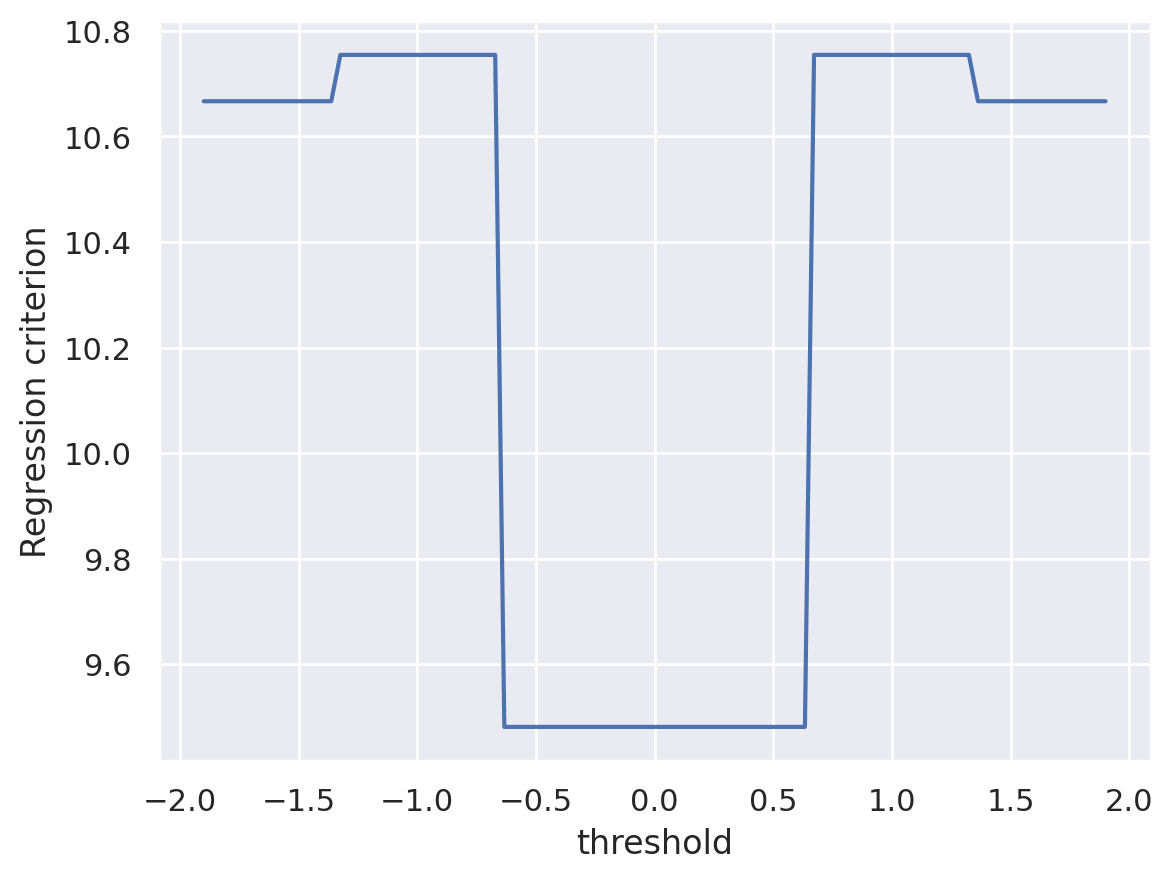

In [34]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

thresholds = np.linspace(-1.9, 1.9, 100)
crit_by_thres = [regression_var_criterion(X, y, thres) for thres in thresholds]

plt.plot(thresholds, crit_by_thres)
plt.xlabel("threshold")
plt.ylabel("Regression criterion");

**<font color='red'>Question 1.</font> What is the worst threshold value (to perform a split) according to the variance criterion?**
- -1.9
- -1.3
- 0
- 1.3
- 1.9 

0

Then let's make splitting in each of the leaves nodes. 
<br> Take your tree with first threshold [$x<0$].
<br> Now add a split in the left branch (where previous split was $x < 0$) using the criterion $[x < -1.5]$, in the right branch (where previous split was $x \geqslant 0$) with the following criterion $[x < 1.5]$. 
<br>It gives us a tree of depth 2 with 7 nodes and 4 leaves. Create a plot of this tree predictions for $x \in [-2, 2]$.

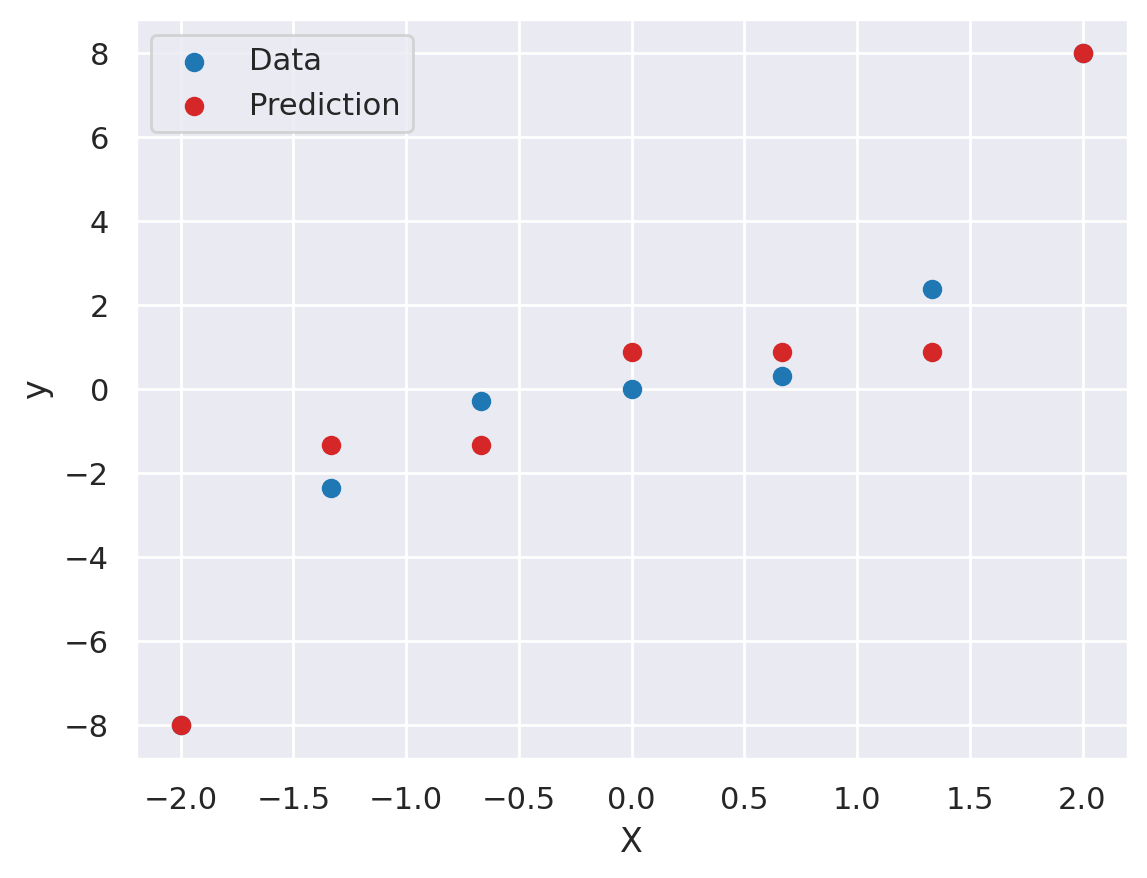

In [35]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

def split(X, y, t):
    X_left, X_right = X[X < t], X[X >= t]
    y_left, y_right = y[X < t], y[X >= t]
    
    return X_left, X_right, y_left, y_right

## Split 1


thresholds = [1.5, -1.5, 0]


def predict(X, y, thresholds):
 
    thresholds.sort()

    y_pred = []

    for x in X:

        if x < thresholds[0]:
           y_pred.append(np.mean(y[X < thresholds[0]]))

        elif x >= thresholds[-1]:
            y_pred.append(np.mean(y[X >= thresholds[-1]]))
          
        else:
            for i in range(len(thresholds[1:])):
                
                if (x >= thresholds[i]) & (x < thresholds[1:][i]):
                    y_pred.append(np.mean(y[(X < thresholds[1:][i]) & (X >= thresholds[i])]))
            
    return np.array(y_pred)
    
y_pred = predict(X, y, thresholds)
    
plt.scatter(X, y, color='tab:blue', label='Data')
plt.scatter(X, y_pred, color='tab:red', label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


**<font color='red'>Question 2.</font> Tree predictions is a piecewise-constant function, right? How many "pieces" (horizontal segments in the plot that you've just built) are there in the interval [-2, 2]?**
- 2
- 4
- 6
- 8

4

## 2. Building a decision tree for predicting heart diseases
Let's read the data on heart diseases. The dataset can be downloaded from the course repo from [here](https://github.com/Yorko/mlcourse.ai/blob/master/data/mlbootcamp5_train.csv) by clicking on `Download` and then selecting `Save As` option. If you work with Git, then the dataset is already there in `data/mlbootcamp5_train.csv`.

**Problem**

Predict presence or absence of cardiovascular disease (CVD) using the patient examination results.

**Data description**

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [36]:
df = pd.read_csv(
    "../../_static/data/assignment3/mlbootcamp5_train.csv", index_col="id", sep=";"
)

In [37]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Transform the features: 
- create "age in years" dividing age by 365.25 and taking floor ($\lfloor{x}\rfloor$ is the largest integer that is less than or equal to $x$) 
- create 3 binary features based on `cholesterol`.
- create 3 binary features based on `gluc`.
<br> Binary features equal to 1, 2 or 3. This method is called dummy-encoding or One Hot Encoding (OHE). It is more convenient to use `pandas.get_dummies`. There is no need to use the original features `cholesterol` and `gluc` after encoding.

In [38]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
df['age in years'] = (df['age'] / 365).astype('int')

df = pd.concat(
    [df, pd.get_dummies(df['cholesterol'], prefix='cholesterol')],
    axis=1,
)

df = pd.concat(
    [df, pd.get_dummies(df['gluc'], prefix='gluc')],
    axis=1,
)

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age in years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,True,False,False,True,False,False
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,False,False,True,True,False,False
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,False,False,True,True,False,False
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,True,False,False,True,False,False
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,True,False,False,True,False,False


Split data into train and holdout parts in the proportion of 7/3 using `sklearn.model_selection.train_test_split` with `random_state=17`.

In [39]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
y = df['cardio']
X = df.drop(columns='cardio')

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

Train a decision tree on the dataset `(X_train, y_train)` with **max depth equal to 3** and `random_state=17`. Plot this tree with `sklearn.tree.export_graphviz` and Graphviz. Here we need to mention that `sklearn` doesn't draw decision trees on its own, but is able to output a tree in the `.dot` format that can be used by Graphviz for visualization. 

How to plot a decision tree, alternatives:
 1. Install Graphviz and pydotplus yourself (see below)
 2. Use our docker image with all needed packages already installed
 3. Easy way: execute `print(dot_data.getvalue())` with `dot_data` defined below (this can be done without pydotplus and Graphviz), go to http://www.webgraphviz.com, paste the graph code string (digraph Tree {...) and generate a nice picture

Take a look how trees are visualized in the [3rd part](https://mlcourse.ai/articles/topic3-dt-knn/) of course materials.

There are may be some troubles with graphviz for Windows users.
The error is 'GraphViz's executables not found'.
<br>To fix that – install Graphviz from [here](https://graphviz.gitlab.io/_pages/Download/Download_windows.html).
<br>Then add graphviz path to your system PATH variable. You can do this manually, but don't forget to restart kernel.
<br>Or just run this code:

In [40]:
# import os
# path_to_graphviz = '' # your path to graphviz (C:\\Program Files (x86)\\Graphviz2.38\\bin\\ for example)
# os.environ["PATH"] += os.pathsep + path_to_graphviz

In [41]:
clf_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier(
            criterion="entropy",
            max_depth=3,
            random_state=17
        ))
    ]
)

clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        random_state=17))])

In [42]:
clf_pipe['clf']

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

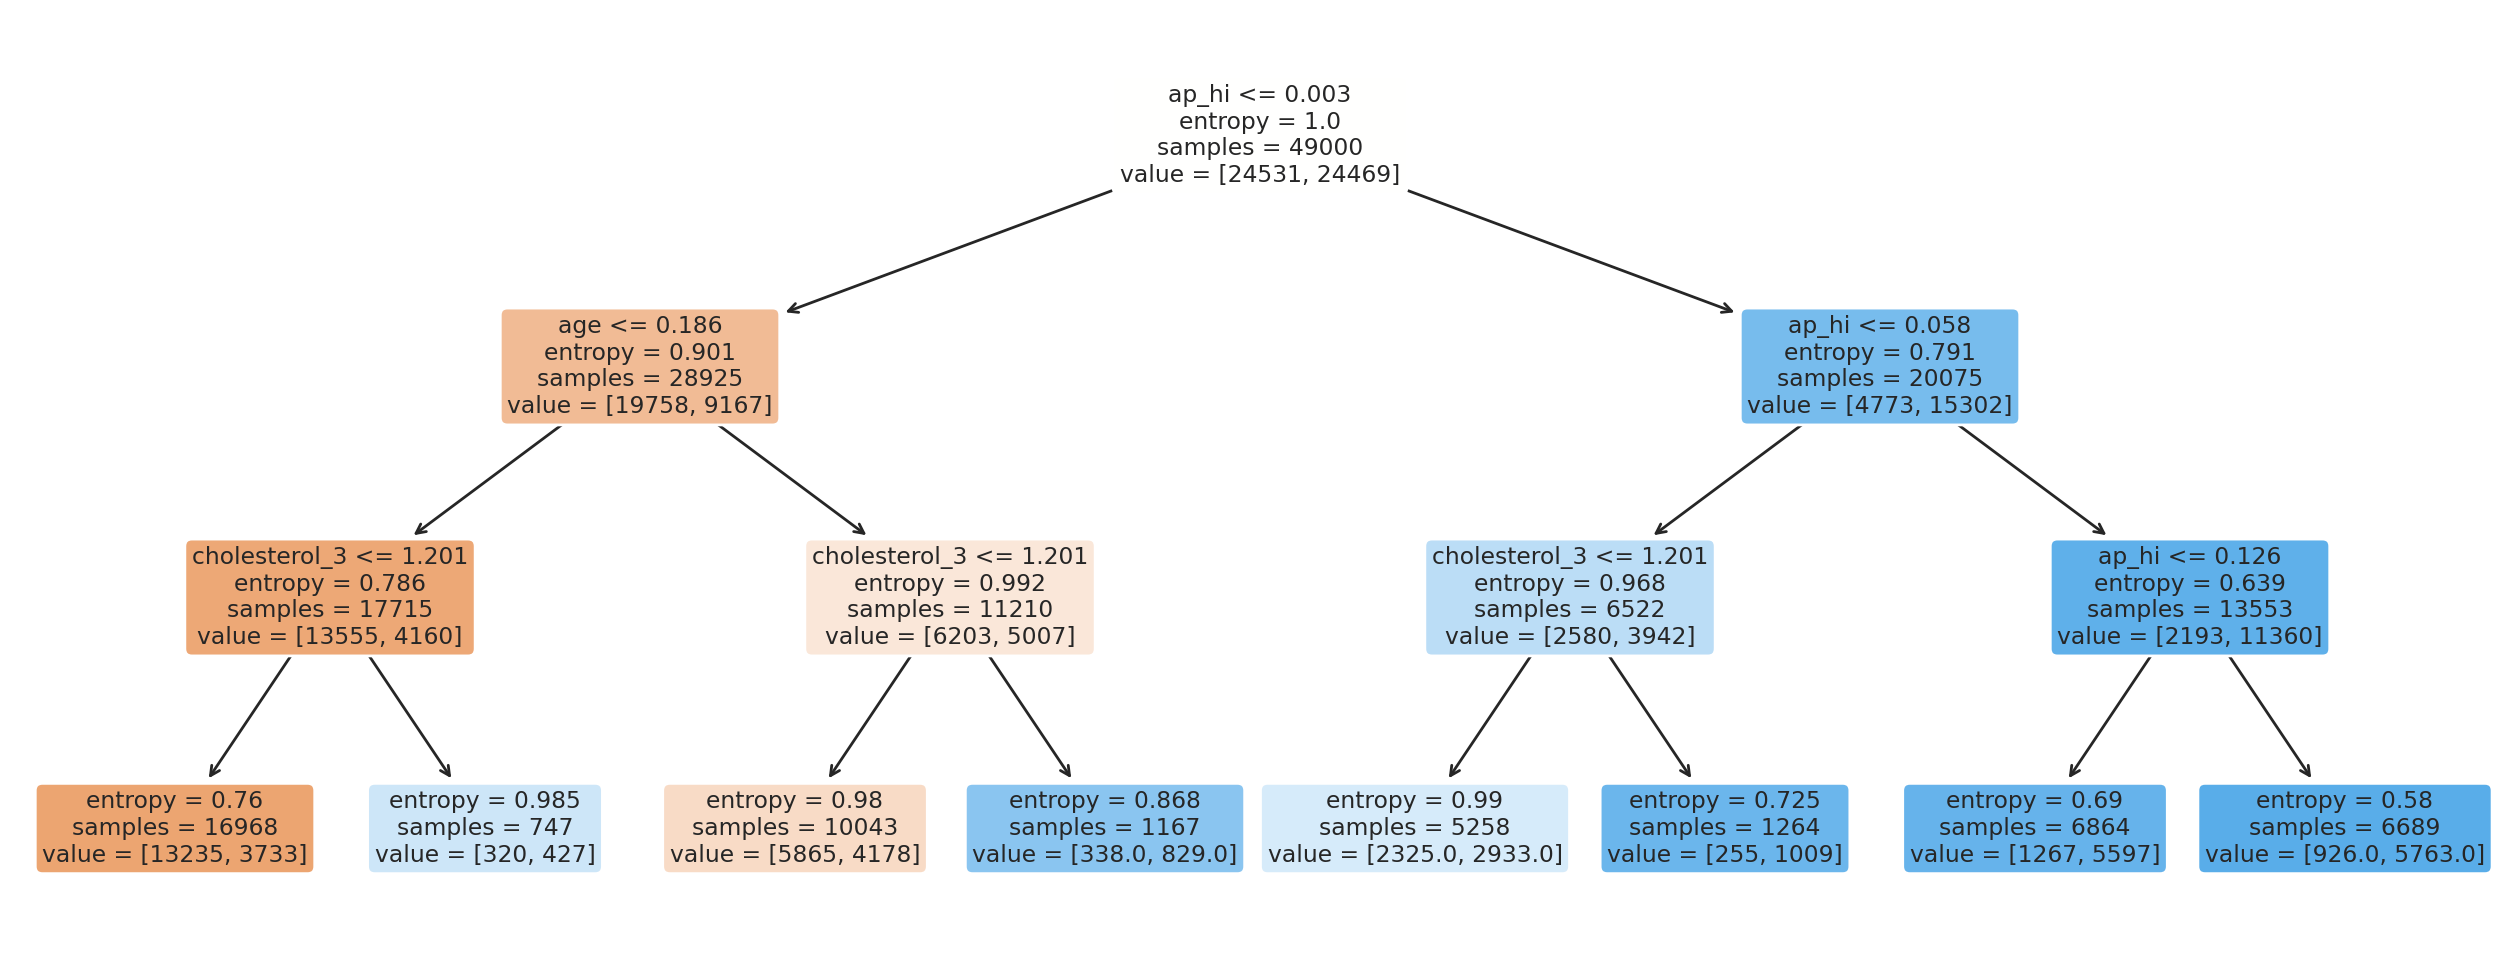

In [43]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
plt.figure(figsize=(16, 6), dpi=100)
plot_tree(clf_pipe['clf'], feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

**<font color='red'>Question 3.</font> Which 3 features are used to make predictions in the created decision tree?**
- age, ap_lo, chol=1
- age, ap_hi, chol=3
- smoke, age, gender
- alco, weight, gluc=3

age, ap_hi, chol=3

Make predictions for holdout data `(X_valid, y_valid)` with the trained decision tree. Calculate accuracy.

In [44]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

y_pred = clf_pipe.predict(X_valid)
acc_1 = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {acc_1:.3f}')

Accuracy: 0.721


Set up the depth of the tree using cross-validation on the dataset `(X_train, y_train)` in order to increase quality of the model. Use `GridSearchCV` with 5 folds. Fix `random_state=17` and change  `max_depth` from 2 to 10.

In [45]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
clf_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('tree', DecisionTreeClassifier(
            criterion="entropy",
            random_state=17
        ))
    ]
)

tree_params = {"tree__max_depth": range(2, 11)}

locally_best_tree = GridSearchCV(
    clf_pipe,
    tree_params,
    cv=5,
    n_jobs=-1,
    verbose=True
)

locally_best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('tree',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               random_state=17))]),
             n_jobs=-1, param_grid={'tree__max_depth': range(2, 11)},
             verbose=True)

Draw the plot to show how mean accuracy is changing in regards to `max_depth` value on cross-validation.

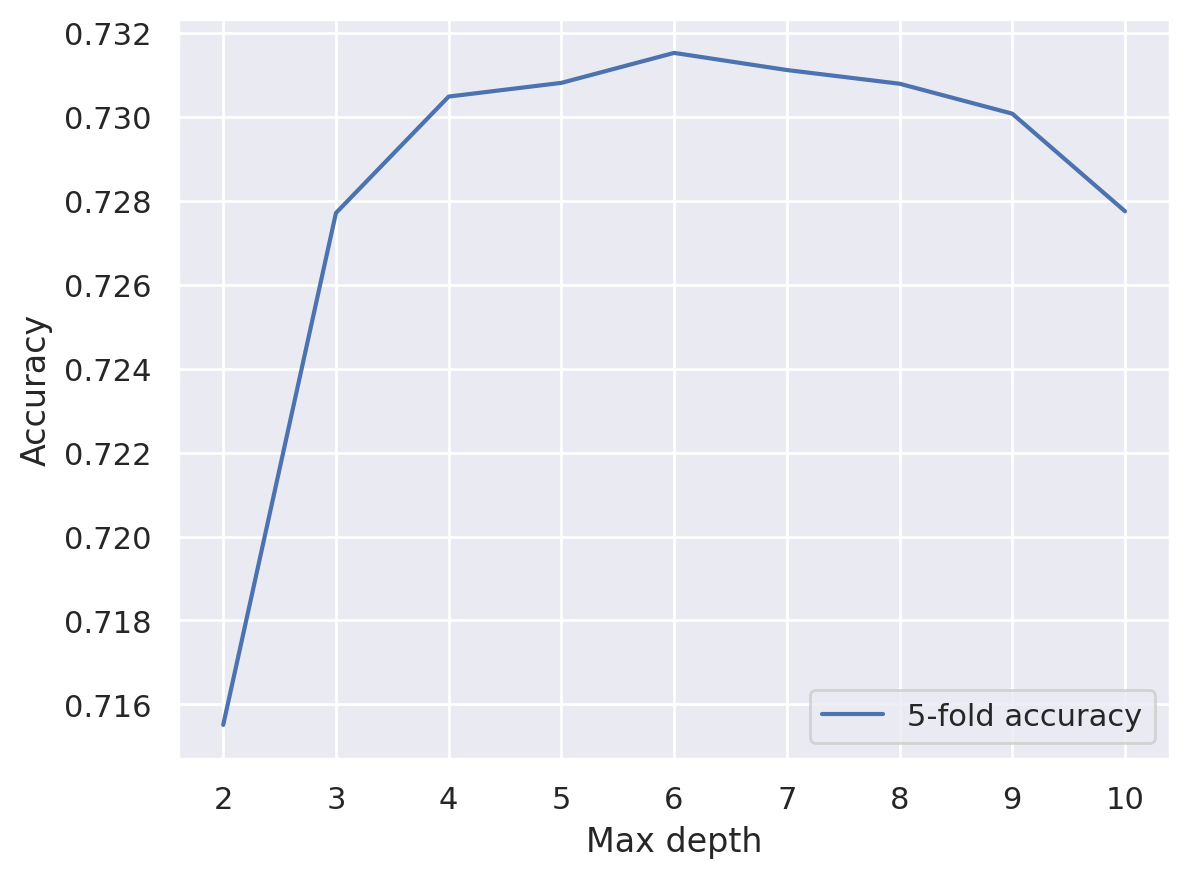

In [46]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

plt.plot(range(2, 11), locally_best_tree.cv_results_['mean_test_score'], label='5-fold accuracy')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Print the best value of `max_depth` where the mean value of cross-validation quality metric reaches maximum. Also compute accuracy on holdout data. This can be done with the trained instance of the class `GridSearchCV`.

In [47]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
locally_best_tree.best_params_

{'tree__max_depth': 6}

Сalculate the effect of `GridSearchCV`: check out the expression (acc2 - acc1) / acc1 * 100%, where acc1 and acc2 are accuracies on holdout data before and after tuning max_depth with GridSearchCV respectively.

In [48]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
tuned_tree = locally_best_tree.best_estimator_
tuned_tree.fit(X_train, y_train)

y_pred = tuned_tree.predict(X_valid)

acc_2 = accuracy_score(y_valid, y_pred)

acc_ratio = (acc_2 - acc_1) / acc_1 * 100

print(f'Accuracy ratio: {acc_ratio:.2f}')

Accuracy ratio: 0.70


**<font color='red'>Question 4.</font> Choose all correct statements:**
- [x] There exists a local maximum of accuracy on the built validation curve
- [ ]`GridSearchCV` increased holdout accuracy by **more** than 1% 
- [ ] There is **no** local maximum of accuracy on the built validation curve
- [x]`GridSearchCV` increased holdout accuracy by **less** than 1%

Take a look at the SCORE table to estimate ten-year risk of fatal cardiovascular disease in Europe. [Source paper](https://academic.oup.com/eurheartj/article/24/11/987/427645).

<img src='../../_static/img/SCORE2007-eng.png' width=70%>

Let's create new features according to this picture:
- $age \in [40,50), age \in [50,55), age \in [55,60), age \in [60,65) $ (4 features)
- systolic blood pressure: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 features)

If the values of age or blood pressure don't fall into any of the intervals then all binary features will be equal to zero. 

<br>Add a ``smoke`` feature.
<br>Build the ``cholesterol``  and ``gender`` features. Transform the ``cholesterol`` to 3 binary features according to it's 3 unique values ( ``cholesterol``=1,  ``cholesterol``=2 and  ``cholesterol``=3). Transform the ``gender`` from 1 and 2 into 0 and 1. It is better to rename it to ``male`` (0 – woman, 1 – man). In general, this is typically done with ``sklearn.preprocessing.LabelEncoder`` but here in case of only 2 unique values it's not necessary.

Finally, the decision tree is built using these 12 binary features (excluding all original features that we had before this feature engineering part).

Create a decision tree with the limitation `max_depth=3` and train it on the whole train data. Use the `DecisionTreeClassifier` class with fixed `random_state=17`, but all other arguments (except for `max_depth` and `random_state`) should be left with their default values.

**<font color='red'>Question 5.</font> Which binary feature is the most important for heart disease detection (i.e., it is placed in the root of the tree)?**
- Systolic blood pressure from 160 to 180 (mmHg)
- Cholesterol level == 3
- Systolic blood pressure from 140 to 160 (mmHg)
- Age from 50 to 55 (years)
- Smokes / doesn't smoke
- Age from 60 to 65 (years)

Systolic blood pressure from 140 to 160 (mmHg)

In [49]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
sub_df = df[['gender', 'age in years', 'smoke', 'ap_hi', 'cholesterol', 'cardio']].copy()
sub_df.head()

,gender,age in years,smoke,ap_hi,cholesterol,cardio
id,,,,,,
0,2,50,0,110,1,0
1,1,55,0,140,3,1
2,1,51,0,130,3,1
3,2,48,0,150,1,1
4,1,47,0,100,1,0


In [50]:
#sub_df = sub_df[sub_df['age in years'] > 39]
#sub_df = sub_df[sub_df['ap_hi'] >= 120]

bins = [40, 50, 55, 60, 65]
names = ['age_40_50', 'age_50_55', 'age_55_60', 'age_60_65']
df_new = pd.get_dummies(
    pd.cut(
        sub_df['age in years'],
        bins=bins,
        labels=names,
        right=True,
    )
)

In [51]:
bins = [120, 140, 160 , 180]
names = ['ap_hi_120_140', 'ap_hi_140_160', 'ap_hi_160_180',]
df_new = pd.concat(
    [
        df_new,
        pd.get_dummies(
            pd.cut(
                sub_df['ap_hi'],
                bins=bins,
                labels=names,
                right=True,
            )
        )
    ],
    axis=1
)

In [52]:
df_new = pd.concat(
    [
        df_new,
        pd.get_dummies(sub_df['cholesterol'], prefix='chol')
    ],
    axis=1
)

In [53]:
df_new['smoke'] = sub_df['smoke']
df_new['male'] = sub_df['gender'] - 1
df_new['cardio'] = sub_df['cardio']
df_new.head()

,age_40_50,age_50_55,age_55_60,age_60_65,ap_hi_120_140,ap_hi_140_160,ap_hi_160_180,chol_1,chol_2,chol_3,smoke,male,cardio
id,,,,,,,,,,,,,
0,True,False,False,False,False,False,False,True,False,False,0,1,0
1,False,True,False,False,True,False,False,False,False,True,0,0,1
2,False,True,False,False,True,False,False,False,False,True,0,0,1
3,True,False,False,False,False,True,False,True,False,False,0,1,1
4,True,False,False,False,False,False,False,True,False,False,0,0,0


In [54]:
y_train = df_new['cardio']
X_train = df_new.drop(columns='cardio')

In [59]:
clf_pipe = Pipeline(
    [
        #('scaler', StandardScaler()),
        ('tree', DecisionTreeClassifier(
            #criterion="entropy",
            random_state=17,
            max_depth=3,
            
        ))
    ]
)

clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('tree', DecisionTreeClassifier(max_depth=3, random_state=17))])

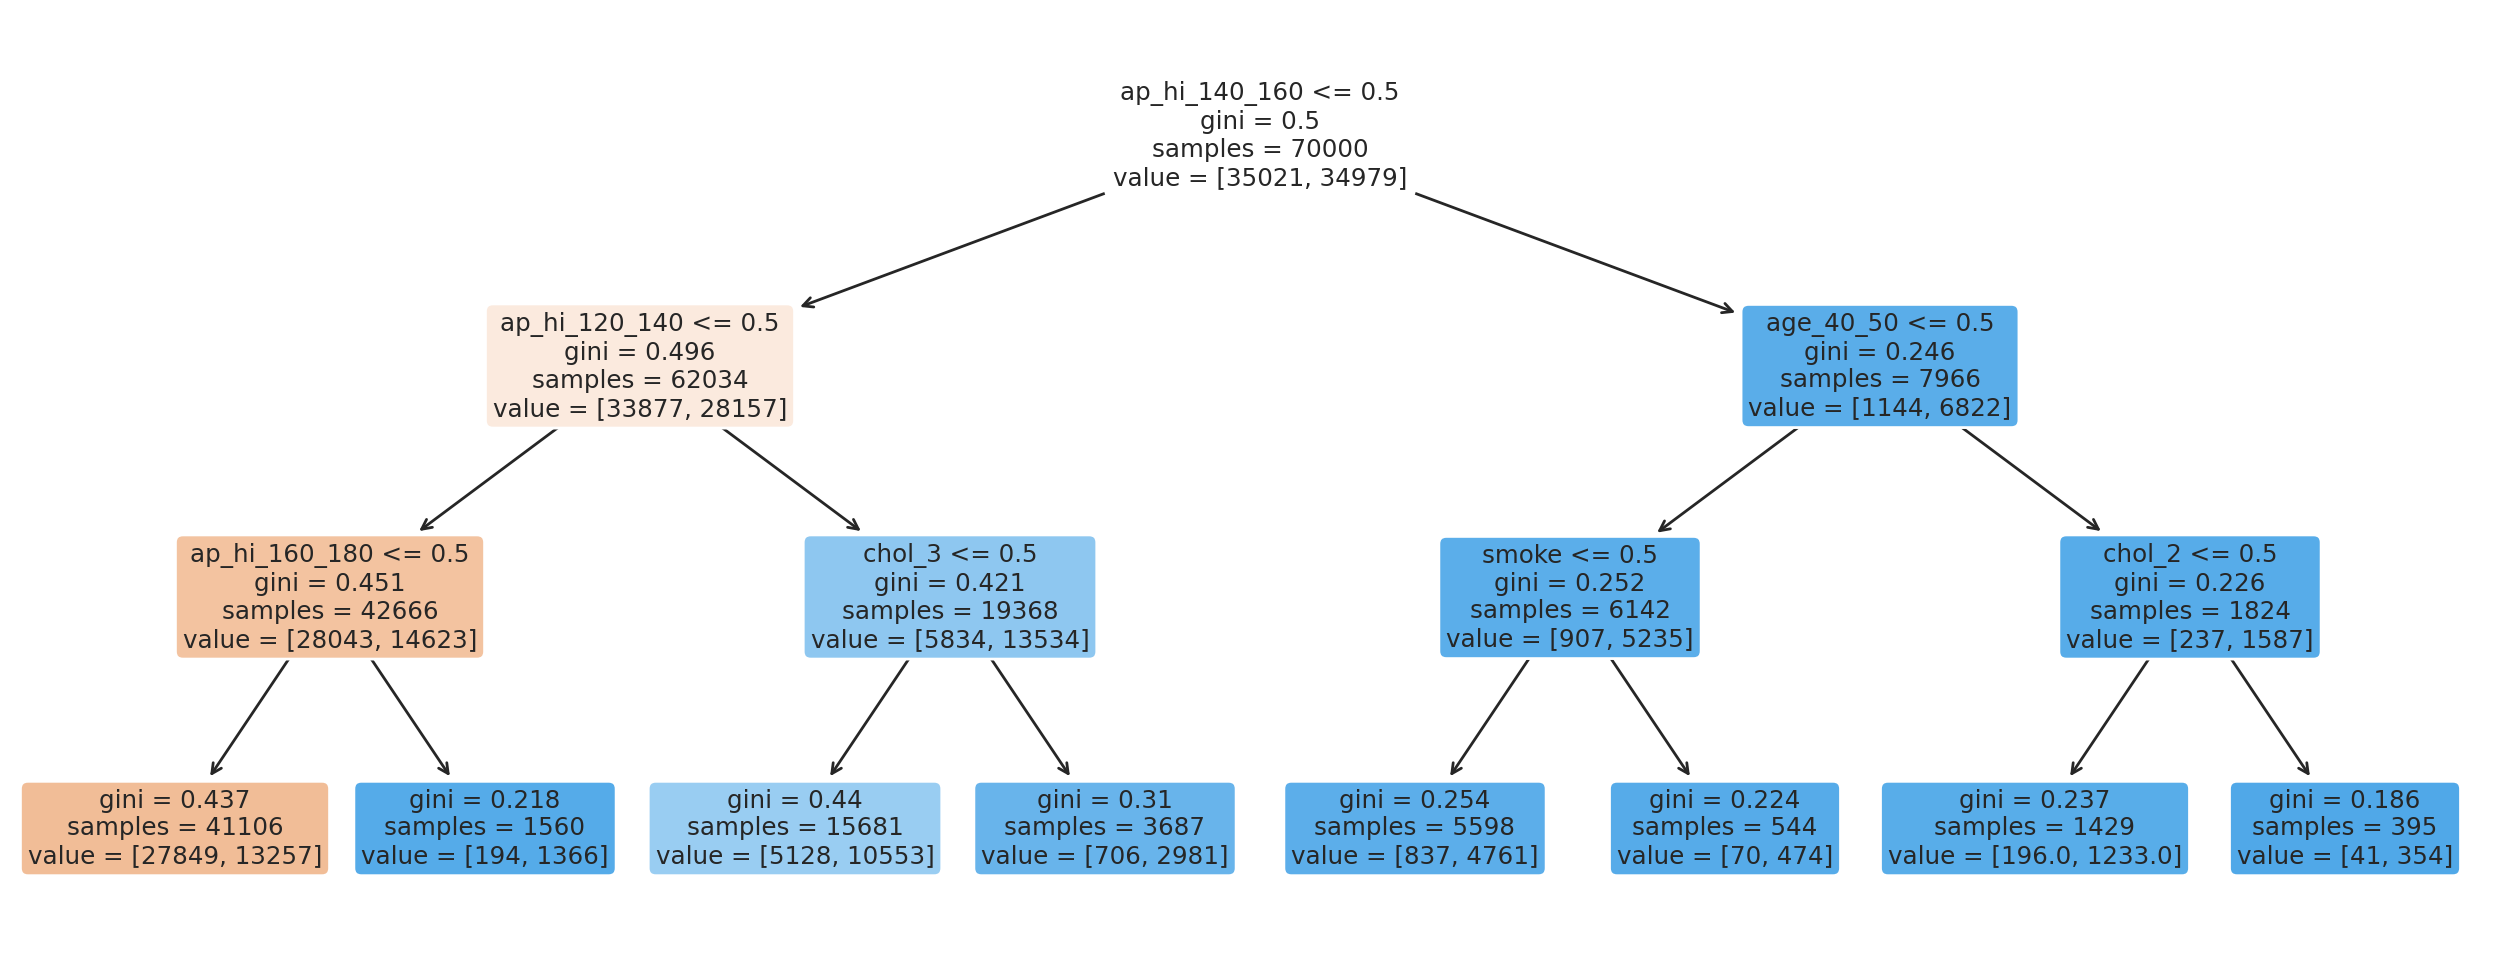

In [60]:
plt.figure(figsize=(16, 6), dpi=100)
plot_tree(clf_pipe['tree'], feature_names=X_train.columns, filled=True, rounded=True)
plt.show()